# Seaborn Practice-Pokemon Dataset

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

## Let's Import Dataset

In [2]:
raw_data_1=pd.read_csv('D:\Datasets\9.Seaborn-Pokemon.csv')
raw_data=raw_data_1.copy()

In [3]:
raw_data.shape

(800, 13)

In [4]:
raw_data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
raw_data.drop(['#','Total'],axis=1,inplace=True)

In [6]:
raw_data.isna().sum()

Name            0
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

## plotting linear regression of 'Attack' and 'Defense' in Seaborn

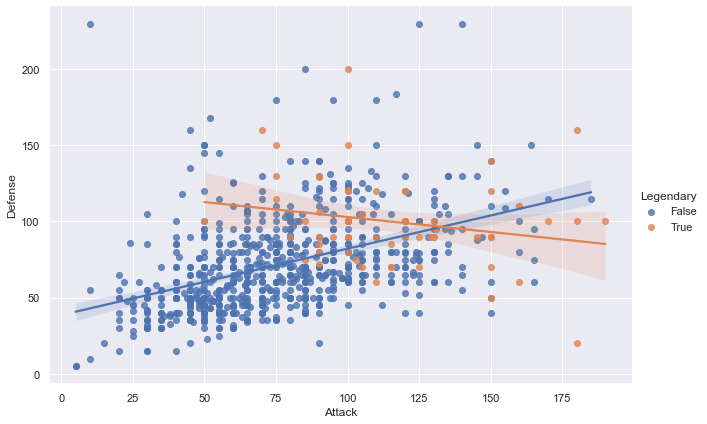

In [7]:
sns.lmplot(x='Attack',y='Defense',data=raw_data,height=6,aspect=1.5,fit_reg=True,hue='Legendary')
plt.show()

In [8]:
raw_data['Legendary'].value_counts()

False    735
True      65
Name: Legendary, dtype: int64

#### Little bit of matplotlib

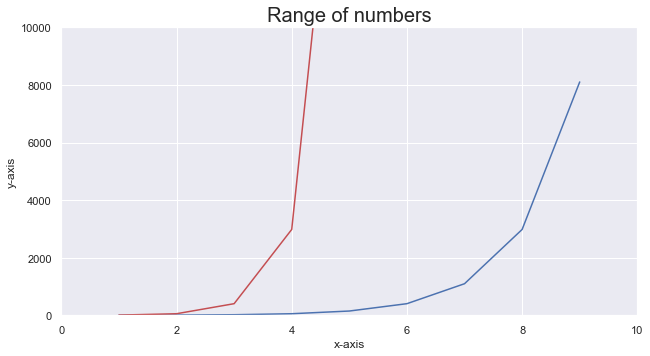

In [9]:
fig=plt.figure(figsize=(8,4))
a1=fig.add_axes([0,0,1,1]) # [x0,y0,width,height] 

x=np.arange(1,10)
a1.plot(x,np.exp(x),'b')
a1.plot(x,np.exp(2*x),'r') # just to show that multiple plot on one graph is possible
a1.set_title('Range of numbers',fontsize=20)

#explicitly set x and y limits
plt.ylim(0,10000)
plt.xlim(0,10)

#explicitly set x and y labels
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

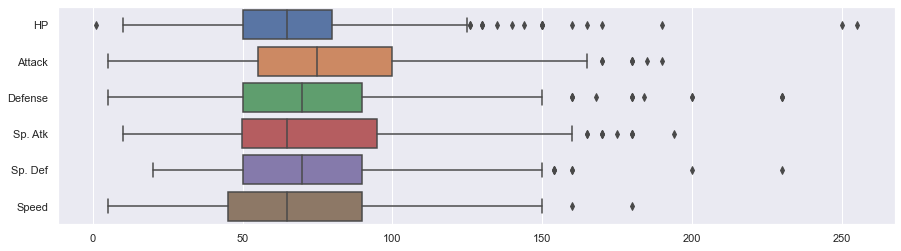

In [10]:
plt.figure(figsize=(15,4))
sns.boxplot(data=raw_data.drop(['Generation','Legendary'],axis=1),orient='h')
plt.show()

In [11]:
# drop the unwanted columns
data_1=raw_data.drop(['Legendary'],axis=1)

In [12]:
data_1

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1
4,Charmander,Fire,NaN,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,50,100,150,100,150,50,6
796,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6
797,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6
798,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6


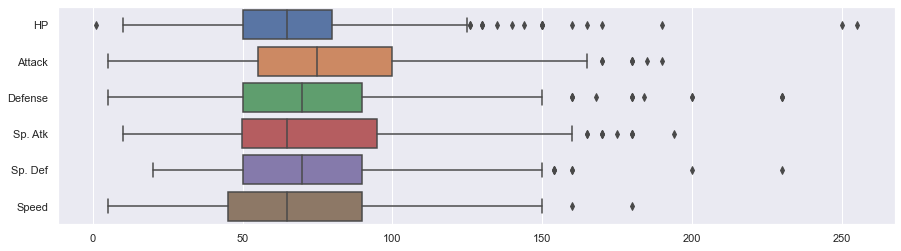

In [13]:
plt.figure(figsize=(15,4))
sns.boxplot(data=data_1.drop(['Generation'],axis=1),orient='h')
plt.show()

## Correlation Analysis
- our objective here is to get low correlation among independent variables and 
- high correlation between a dependent and independent variable.

In [14]:
corr=data_1.corr()
corr

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121
Generation,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000


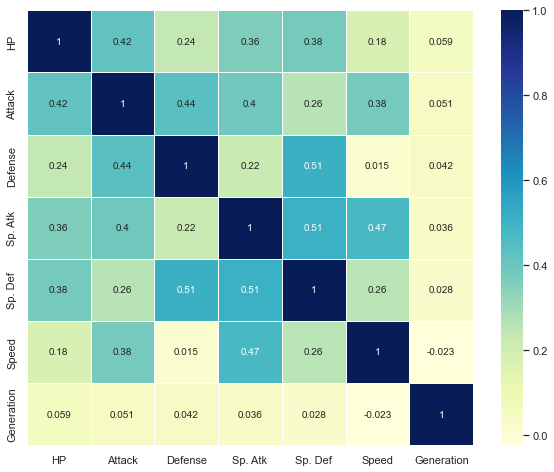

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,linewidths=0.5,cmap="YlGnBu")
plt.show()

- Correlation between attack,defense and special attack,special defense is high so we are dropping special attack

In [16]:
data_2=data_1.drop(['Sp. Atk','Sp. Def'],axis=1)

In [17]:
corr_2=data_2.corr()
corr_2

,HP,Attack,Defense,Speed,Generation
HP,1.000000,0.422386,0.239622,0.175952,0.058683
Attack,0.422386,1.000000,0.438687,0.381240,0.051451
Defense,0.239622,0.438687,1.000000,0.015227,0.042419
Speed,0.175952,0.381240,0.015227,1.000000,-0.023121
Generation,0.058683,0.051451,0.042419,-0.023121,1.000000


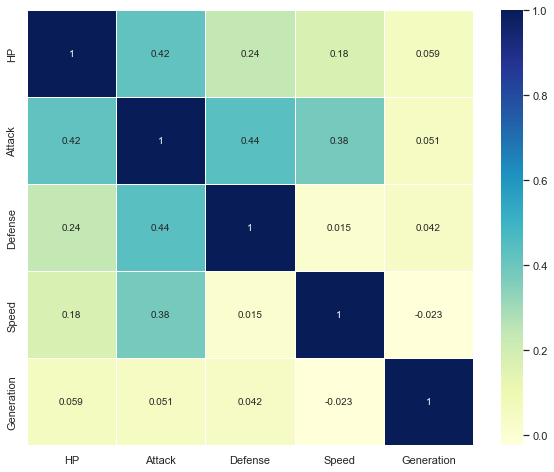

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_2,annot=True,linewidths=0.5,cmap="YlGnBu")
plt.show()

## To check if inputs are correlated to output or not

In [19]:
data_3=data_2.copy()
data_3['Total']=raw_data_1['Total']

In [20]:
corr_3=data_3.corr()

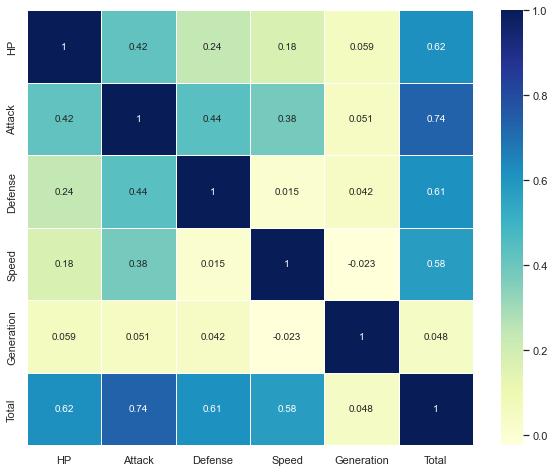

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_3,annot=True,linewidths=0.5,cmap="YlGnBu")
plt.show()

## As we can see that generation is showing very low correlation with output,so we can drop it from inputs

In [22]:
data_4=data_3.drop(['Generation'],axis=1)
data_4

,Name,Type 1,Type 2,HP,Attack,Defense,Speed,Total
0,Bulbasaur,Grass,Poison,45,49,49,45,318
1,Ivysaur,Grass,Poison,60,62,63,60,405
2,Venusaur,Grass,Poison,80,82,83,80,525
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,80,625
4,Charmander,Fire,NaN,39,52,43,65,309
...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,50,100,150,50,600
796,DiancieMega Diancie,Rock,Fairy,50,160,110,110,700
797,HoopaHoopa Confined,Psychic,Ghost,80,110,60,70,600
798,HoopaHoopa Unbound,Psychic,Dark,80,160,60,80,680


In [23]:
corr_4=data_4.corr()

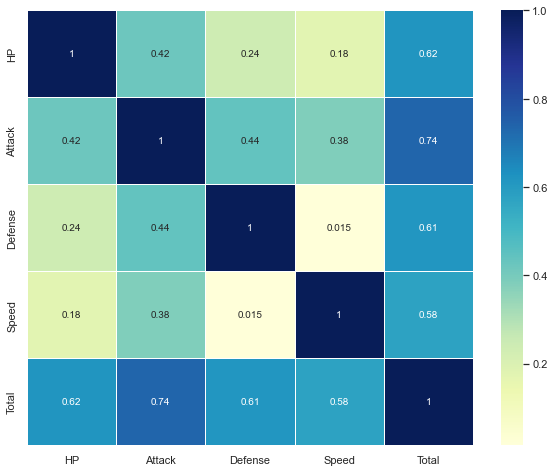

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_4,annot=True,linewidths=0.5,cmap="YlGnBu")
plt.show()

## It looks good, Now we can model it
- I havent preprocessed it for outliers and missing values

In [25]:
input_data=data_4.drop(['Total'],axis=1)

In [26]:
input_data.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Speed
0,Bulbasaur,Grass,Poison,45,49,49,45
1,Ivysaur,Grass,Poison,60,62,63,60
2,Venusaur,Grass,Poison,80,82,83,80
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,80
4,Charmander,Fire,NaN,39,52,43,65


## Univariate Visualisation

### Distplot

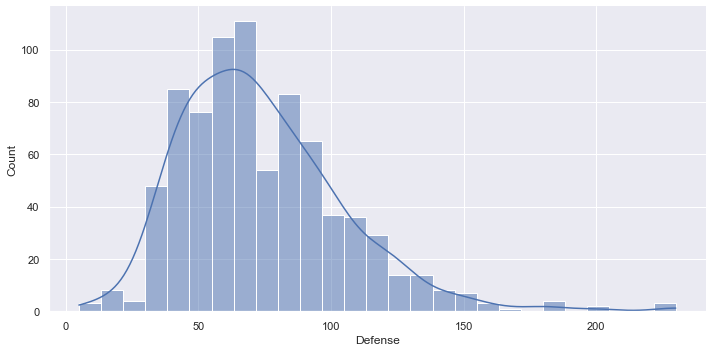

In [27]:
sns.displot(data=input_data['Defense'],kde=True,height=5,aspect=2)
plt.show()

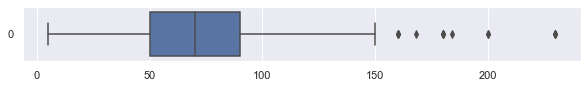

In [28]:
plt.figure(figsize=(10,1))
sns.boxplot(data=input_data['Defense'],orient='h')
plt.show()

In [29]:
q_3=input_data['Defense'].quantile(0.75).round(2)
q_1=input_data['Defense'].quantile(0.25).round(2)

In [30]:
q_3

90.0

In [31]:
q_1

50.0

In [32]:
IQR=q_3-q_1
IQR

40.0

In [33]:
input_data['Defense']

0       49
1       63
2       83
3      123
4       43
      ... 
795    150
796    110
797     60
798     60
799    120
Name: Defense, Length: 800, dtype: int64

## Treating Outliers

<Figure size 1080x576 with 0 Axes>

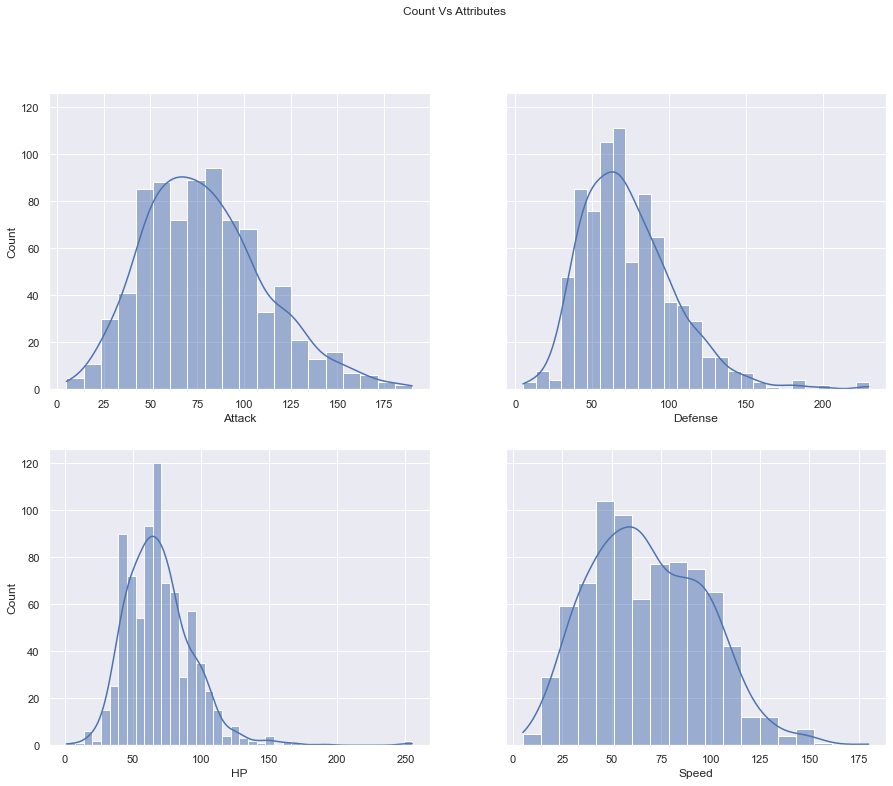

In [34]:
plt.figure(figsize=(15,8))
fig,axes=plt.subplots(2,2,sharey=True,figsize=(15,12))
fig.suptitle('Count Vs Attributes')
sns.histplot(ax=axes[0,0],data=input_data['Attack'],kde=True)
sns.histplot(ax=axes[0,1],data=input_data['Defense'],kde=True)
sns.histplot(ax=axes[1,0],data=input_data['HP'],kde=True)
sns.histplot(ax=axes[1,1],data=input_data['Speed'],kde=True)
plt.show()

In [35]:
input_data_1=input_data[input_data['Defense']<input_data['Defense'].quantile(0.99)]
input_data_2=input_data_1[input_data_1['Attack']<input_data_1['Attack'].quantile(0.99)]
input_data_3=input_data_2[input_data_2['HP']<input_data_2['HP'].quantile(0.99)]
input_data_4=input_data_3[input_data_3['Speed']<input_data_3['Speed'].quantile(0.99)]

In [36]:
input_data_4.shape

(763, 7)

In [37]:
input_data.shape

(800, 7)

<Figure size 1080x576 with 0 Axes>

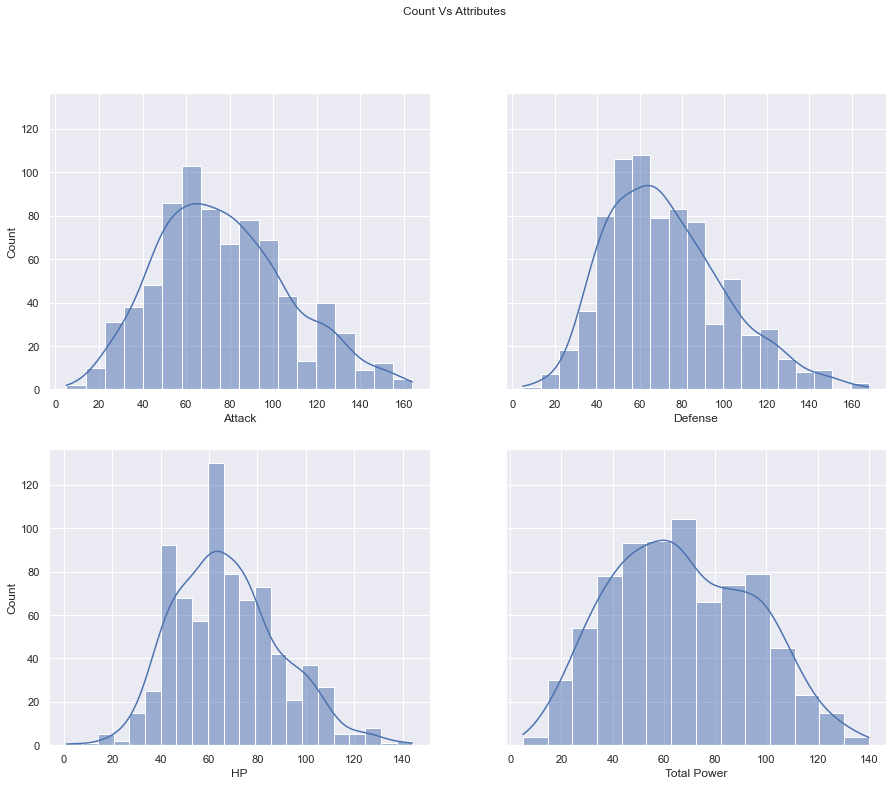

In [38]:
plt.figure(figsize=(15,8))
fig,axes=plt.subplots(2,2,sharey=True,figsize=(15,12))
fig.suptitle('Count Vs Attributes')
sns.histplot(ax=axes[0,0],data=input_data_4['Attack'],kde=True)
sns.histplot(ax=axes[0,1],data=input_data_4['Defense'],kde=True)
sns.histplot(ax=axes[1,0],data=input_data_4['HP'],kde=True)
sns.histplot(ax=axes[1,1],data=input_data_4['Speed'],kde=True)
plt.xlabel('Total Power')
plt.show()

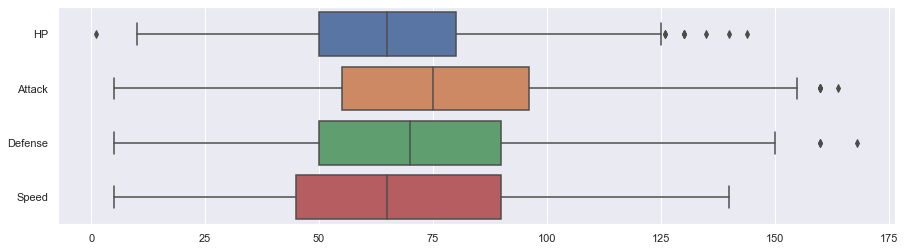

In [39]:
plt.figure(figsize=(15,4))
sns.boxplot(data=input_data_4,orient='h')
plt.show()

- As we can observe that values of outliers are not very far from box plot. This data is acceptable for prediction.
- Correlation is already observed and corrected.
## And we already know that Total Power is sum of other attributes so there is nothing to predict for now by keeping "Total Power as Target".

# Bivariate Plot

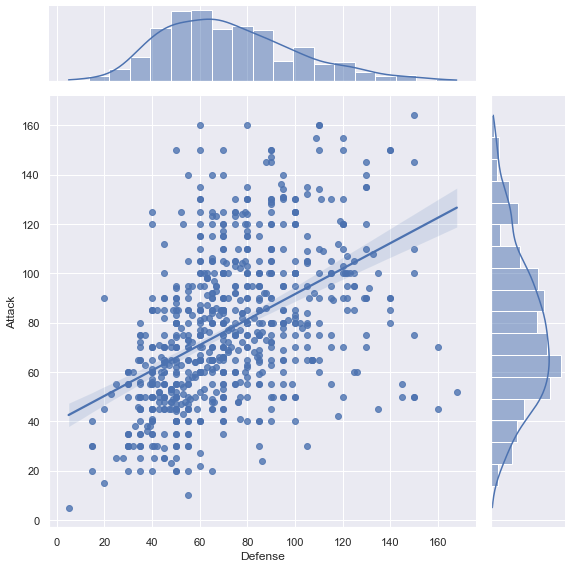

In [40]:
sns.jointplot(x=input_data_4['Defense'],y=input_data_4['Attack'],height=8,kind='reg')

In [41]:
input_data_4[['Defense']]

,Defense
0,49
1,63
2,83
3,123
4,43
...,...
795,150
796,110
797,60
798,60


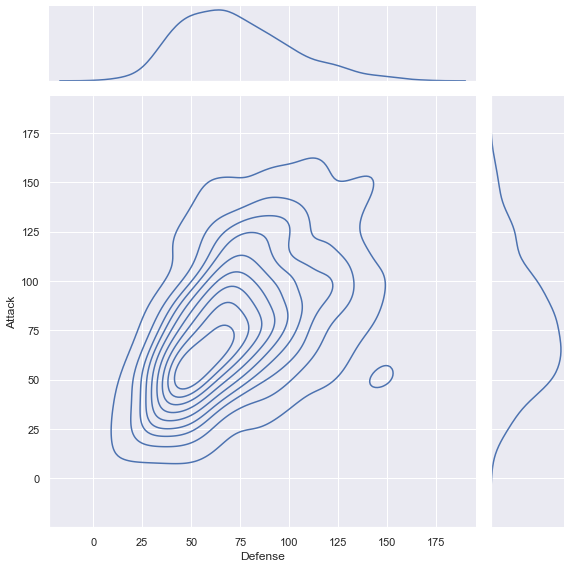

In [42]:
sns.jointplot(x=input_data_4['Defense'],y=input_data_4['Attack'],height=8,kind='kde')

# Multivariate Plots

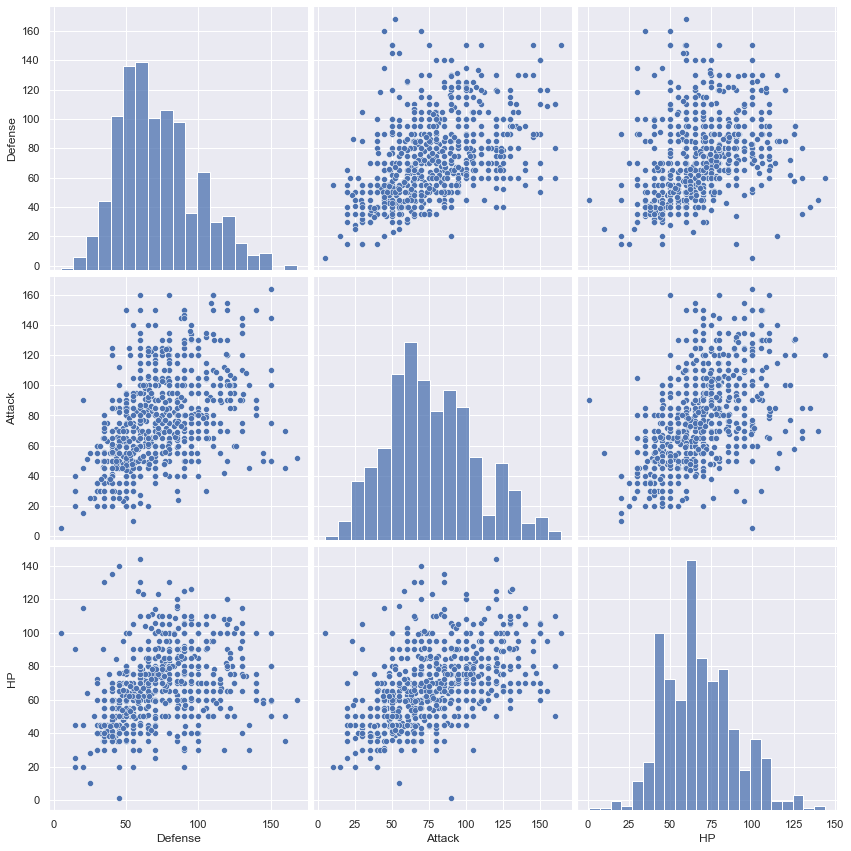

In [43]:
sns.pairplot(input_data_4[['Defense','Attack','HP']],kind='scatter',height=4)
plt.show()

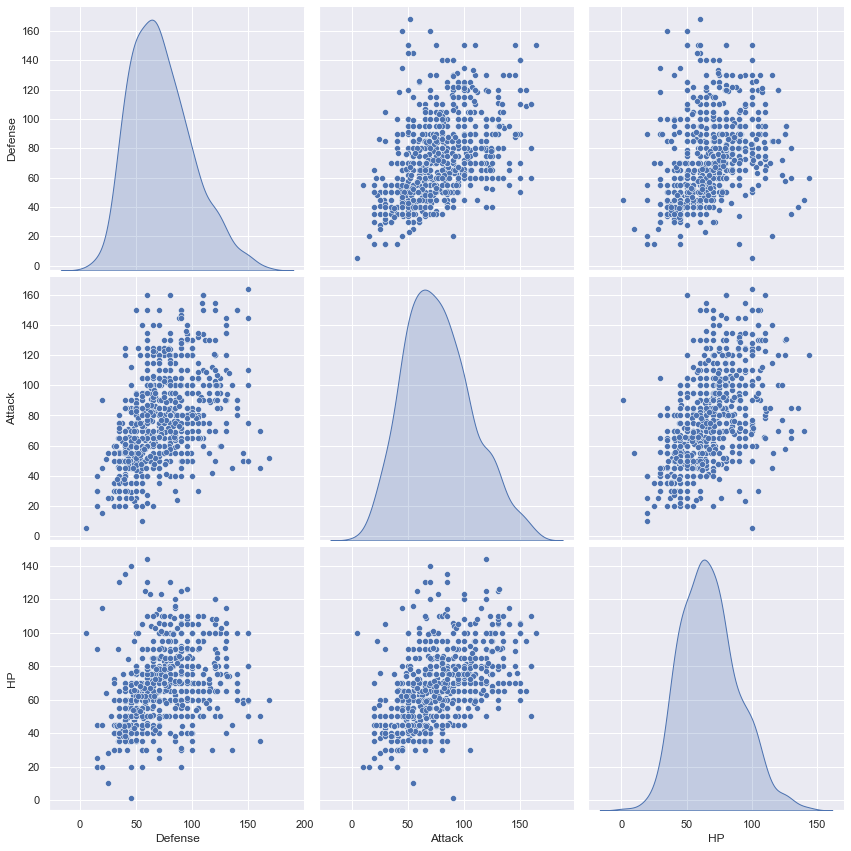

In [44]:
sns.pairplot(input_data_4[['Defense','Attack','HP']],kind='scatter',diag_kind='kde',height=4)
plt.show()

## Categorical Data Visualisation

In [45]:
data=pd.read_csv(r'D:\Datasets\10.Automobile.csv')

In [46]:
data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


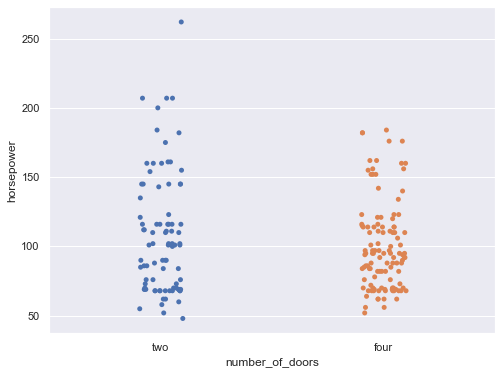

In [47]:
plt.figure(figsize=(8,6))
sns.stripplot(x=data['number_of_doors'],y=data['horsepower'])
plt.show()

In [48]:
data['number_of_doors'].value_counts()

four    114
two      87
Name: number_of_doors, dtype: int64

In [49]:
data.shape

(201, 26)

<AxesSubplot: xlabel='horsepower', ylabel='number_of_doors'>

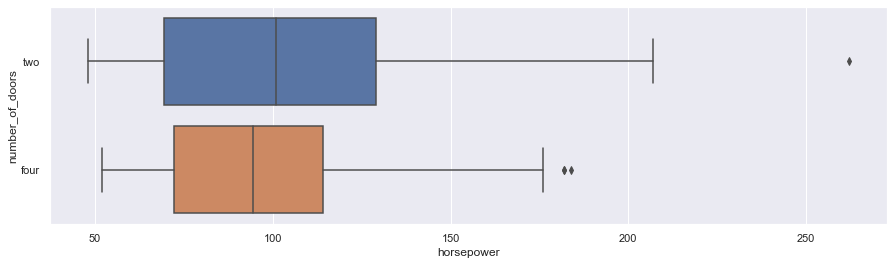

In [50]:
data_1=data.copy()
plt.figure(figsize=(15,4))
data_1['number_of_doors']=data['number_of_doors'].map({'two':2,'four':4})
sns.boxplot(x=data_1['horsepower'],y=data['number_of_doors'],orient='h')

In [51]:
data_2=data_1[data_1['horsepower']<data_1['horsepower'].quantile(0.99)]

<AxesSubplot: xlabel='horsepower', ylabel='number_of_doors'>

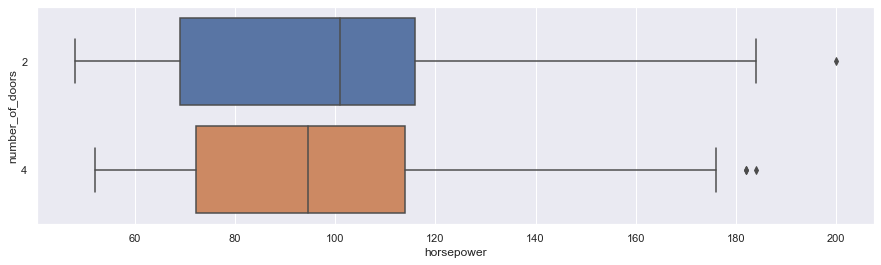

In [52]:
plt.figure(figsize=(15,4))
sns.boxplot(x=data_2['horsepower'],y=data_2['number_of_doors'],orient='h')

In [53]:
data_2.head()

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


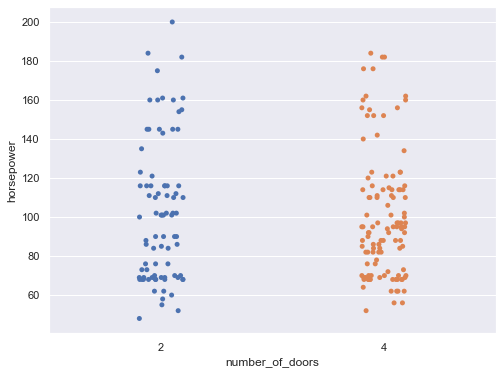

In [54]:
plt.figure(figsize=(8,6))
sns.stripplot(x=data_2['number_of_doors'],y=data_2['horsepower'])
plt.show()

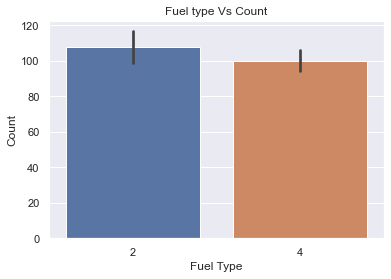

In [55]:
sns.barplot(x=data_1['number_of_doors'],y=data_1['horsepower']).set(xlabel='Fuel Type',ylabel='Count',title='Fuel type Vs Count')
plt.show()